<a href="https://colab.research.google.com/github/acrisandradee/algoritimoIAparaclusterizacao/blob/master/pd_cris_andrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 1 Infraestrutura**



**Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:**

> 1. Você está rodando em Python 3.9+

In [ ]:
!python --version


Python 3.10.12


> 2. Você está usando um ambiente virtual: Virtualenv ou Anaconda



In [ ]:
!pip install virtualenv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 24.8 MB/s eta 0:00:00


In [ ]:
!virtualenv ambiente


created virtual environment CPython3.10.12.final.0-64 in 1513ms
  creator CPython3Posix(dest=/content/ambiente, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.3.1, setuptools==75.2.0, wheel==0.44.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


> 3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

In [ ]:
!ambiente/bin/python -m pip install numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 98.8 MB/s eta 0:00:00


> 4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.5
astropy-iers-data==0.2024.11.4.0.33.34
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.25.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1

> 5. Tire um printscreen do ambiente que será usado rodando em sua máquina

In [ ]:
!ambiente/bin/python -c "import sys; print(sys.executable)"


/content/ambiente/bin/python


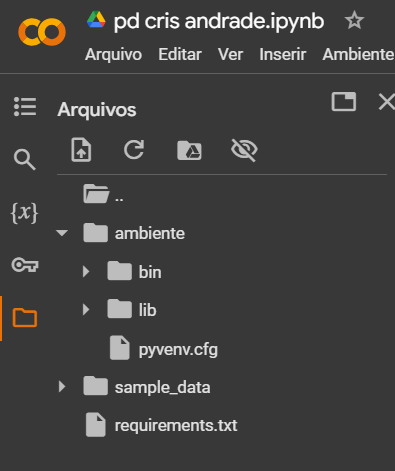

> 6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

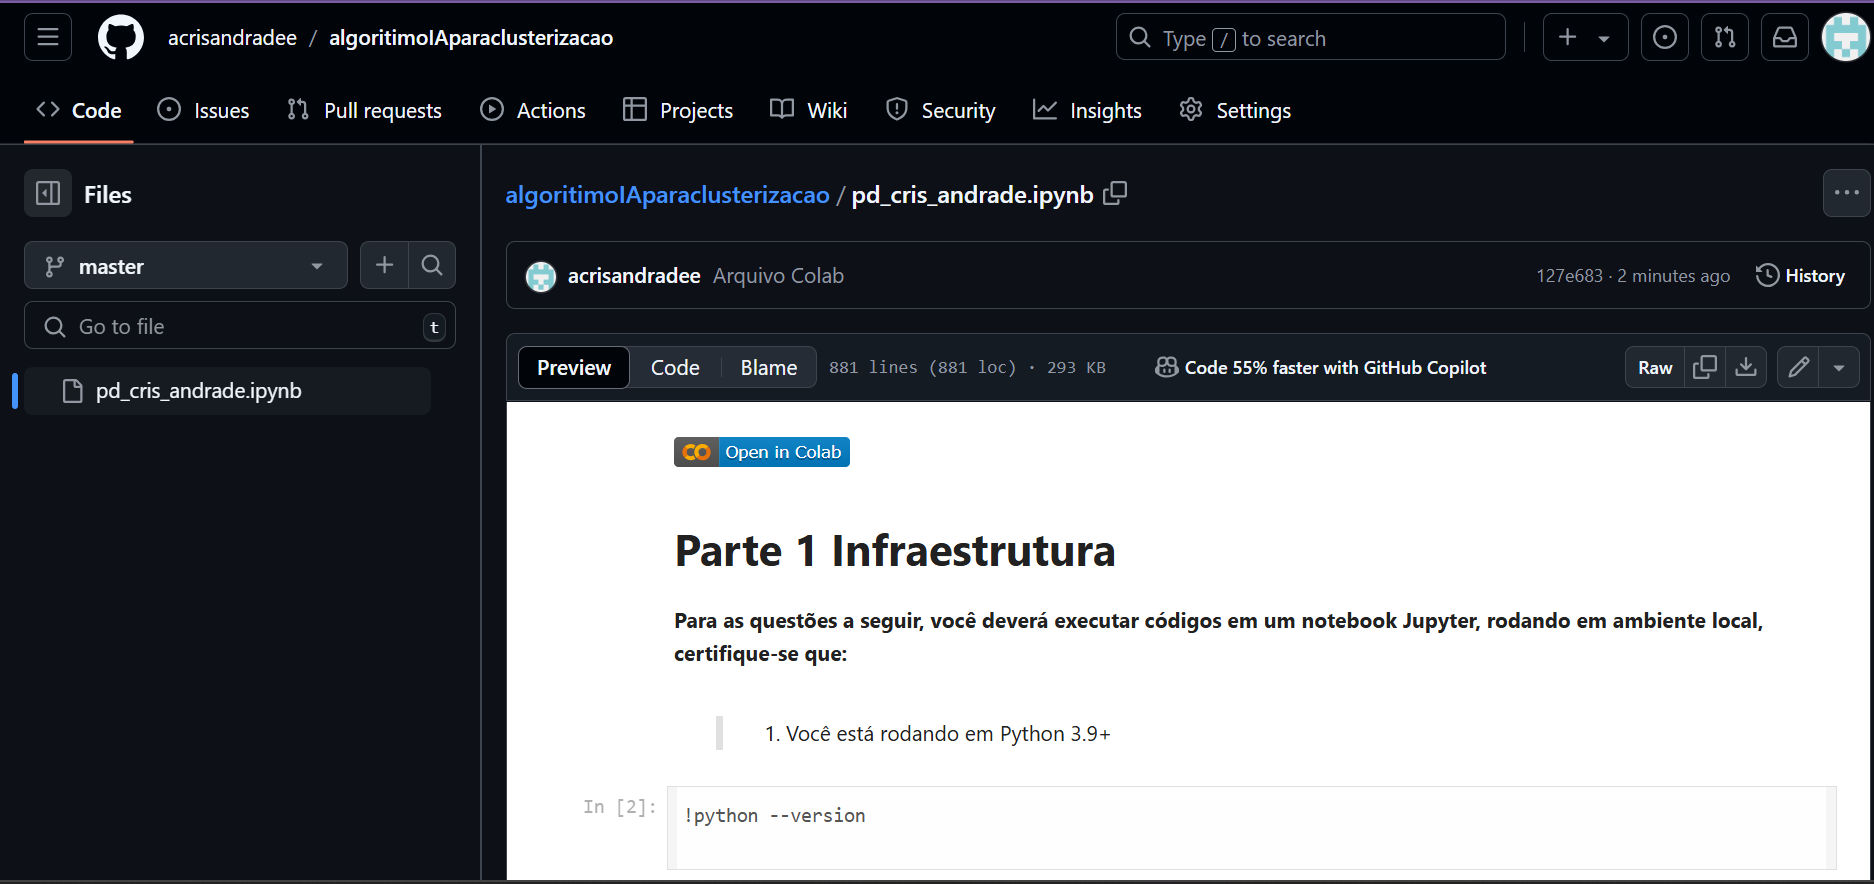

# **Link repositorio: https://github.com/acrisandradee/algoritimoIAparaclusterizacao/blob/master/pd_cris_andrade.ipynb**



---



# **Parte 2  Escolha de base de dados**




**Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.**

> 1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

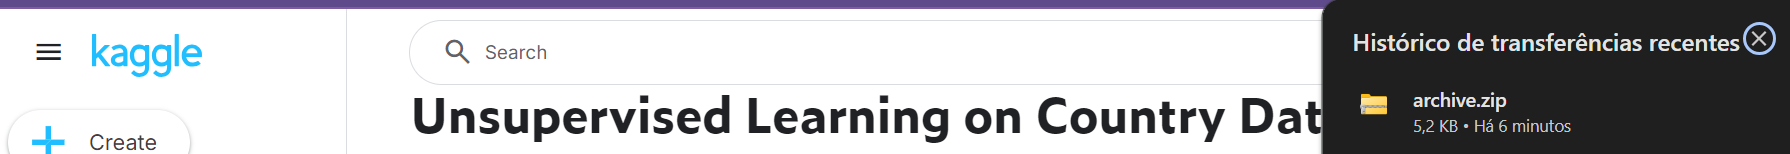

In [47]:
import pandas as pd
data = '/content/archive/Country-data.csv'
dados = pd.read_csv(data)

dados.isnull().sum()
dados.info
print(dados)
#Carregando os dados

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49   

> 2. Quantos países existem no dataset?

In [45]:
total_paises = dados['country'].nunique()
print(f'O total de países e: {total_paises}')


O total de países e: 167


> 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

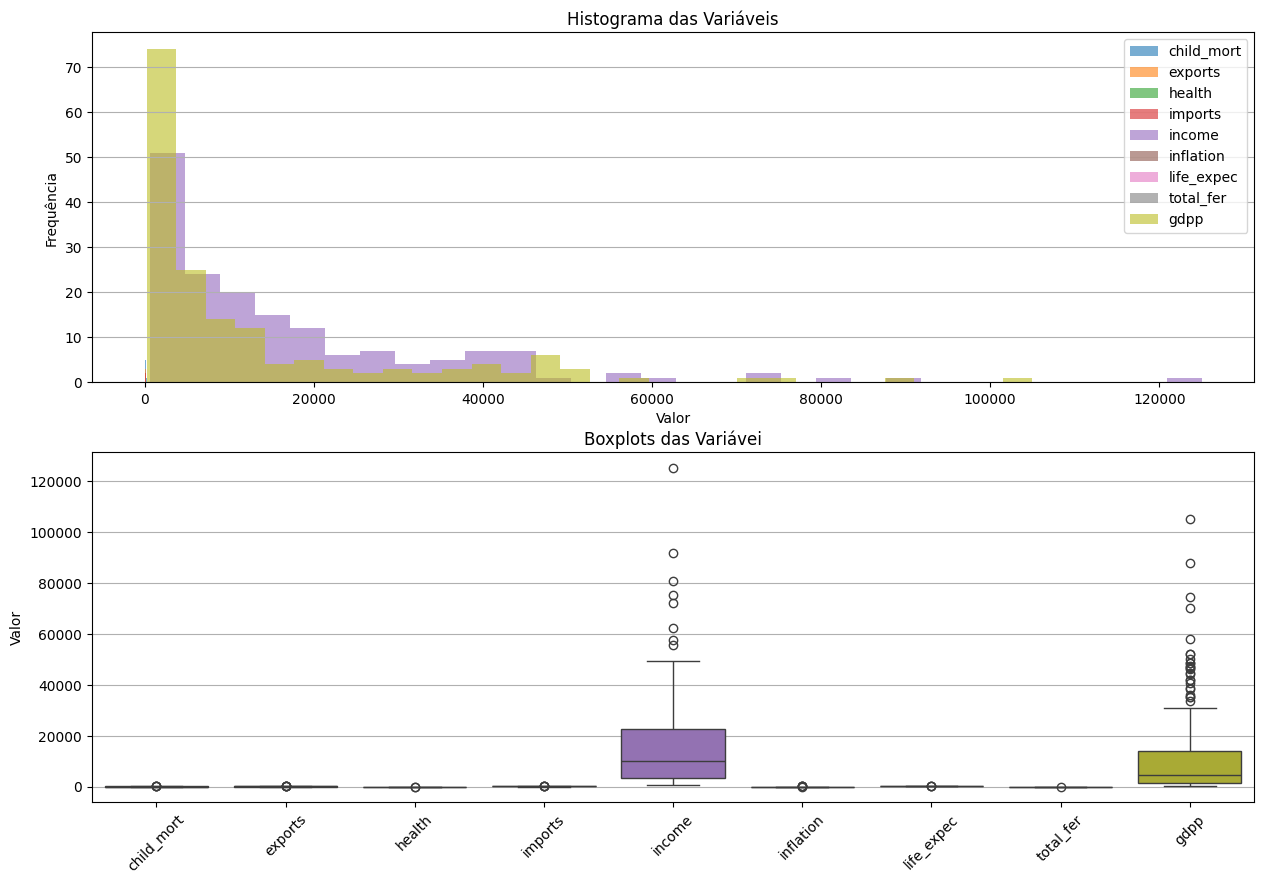

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

variaveis = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(15, 10))

# Histograma das variáveis
plt.subplot(2, 1, 1)
for var in variaveis:
    plt.hist(dados[var], bins=30, alpha=0.6, label=var)
plt.title('Histograma das Variáveis')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y')

# Boxplot das variáveis
plt.subplot(2, 1, 2)
sns.boxplot(data=dados[variaveis])
plt.title('Boxplots das Variávei')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


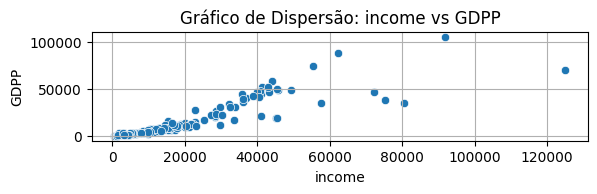

In [55]:
plt.subplot(3, 1, 3)
sns.scatterplot(data=dados, x='income', y='gdpp')
plt.title('Gráfico de Dispersão: income vs GDPP')
plt.xlabel('income')
plt.ylabel('GDPP')
plt.grid()

>Nos gráficos, dá para ver que a maioria das variáveis tem valores baixos, porem algumas apresentam valores bem altos, mostrando uma distribuição desigual e a presença de outliers. O boxplot confirma isso, especialmente para variaveis"income" e "gdp", que têm valores bem fora da média.Optei por não remover nada mesmo com outlier pois, em alguns casos, eles podem representar informações importantes e características específicas dos dados tipo em variáveis econômicas, financeiras ou sociais, onde valores extremos podem indicar particularidades relevantes, como países com economias muito diferentes.Em vez de descartar esses dados, aplicamos a padronizacao.

> 4. Realize o pré-processamento adequado dos dados.

In [85]:
from sklearn.preprocessing import StandardScaler

variaveis = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Padronizar os dados
scaler = StandardScaler()
numerical_data = dados[variaveis]
dados_padronizados = scaler.fit_transform(numerical_data)
dados_padronizados

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

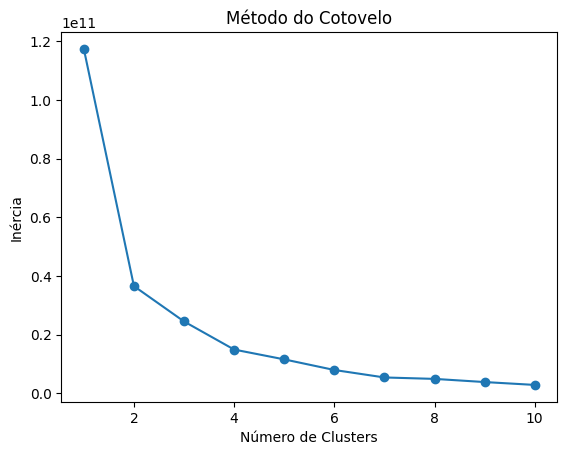

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Access the columns using indexing instead of attribute access
    kmeans.fit(dados[variaveis])
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)  # Exemplo com 3 clusters
y_kmeans = kmeans.fit_predict(dados_padronizados)
y_kmeans

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

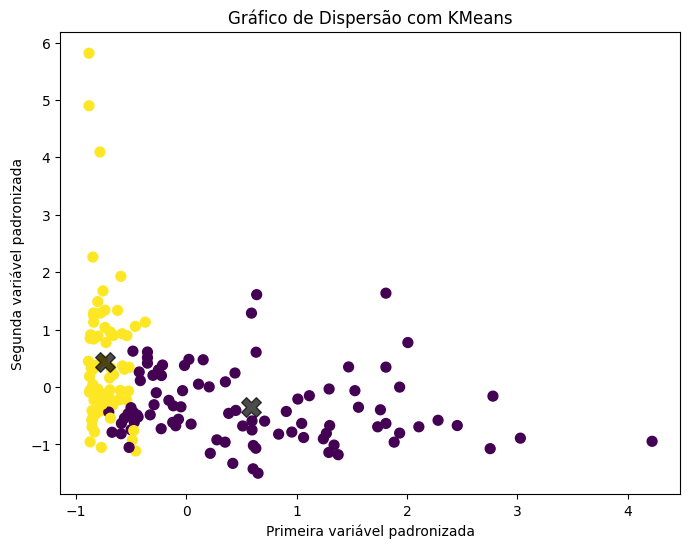

In [94]:
plt.figure(figsize=(8, 6))


plt.scatter(dados_padronizados[:, 0], dados_padronizados[:, 1], c=y_kmeans, s=50, cmap='viridis')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7, marker='X')

plt.title('Gráfico de Dispersão com KMeans')
plt.xlabel('Primeira variável padronizada')
plt.ylabel('Segunda variável padronizada')
plt.show()



>

